## Introduction

Malaria continues to cast a long shadow across the African continent, affecting the lives of millions and challenging healthcare systems year after year. In the quest to illuminate this relentless epidemic, I will embark on a journey, "Malaria Insights Africa." This data-driven project is dedicated to unraveling the mysteries of malaria's grip on the continent. I will explore five key facets: Malaria Incidence Trends, Rural vs. Urban Disparities, Geo-spatial Analysis, Population Growth Impact, and Basic Services and Malaria.

## Data Collection and Preparation

The data used in this project was obtained from the [Malaria in Africa Dataset](https://www.kaggle.com/datasets/lydia70/malaria-in-africa) (World Bank Open Data Source made available through Kaggle. Geo-spatial concepts such as longitude and latitude have been collected manually by the Kaggle author, and transformed it into an understandable dataset with a time frame spanning over 10 years). It contains 9889 rows and 10 columns of data, and is saved as a CSV file. It has details of all African countries from 2007 till 2017. The dataset includes the cases of malaria that have been reported in each country and each year, as well as data on preventive measures that have been taken to prevent malaria.

In [1]:
# Installing Packages

install.packages("readr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("sf")
install.packages("rnaturalearth")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Loading Packages

library(readr) 
library(dplyr) 
library(ggplot2)
library(sf)
library(rnaturalearth)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE

Support for Spatial objects (`sp`) will be deprecated in {rnaturalearth} and will be removed in a future release of the pac

In [ ]:
list.files("/kaggle/input/")

In [3]:
# Load the dataset

malaria_dataset <- read.csv("/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv")

In [4]:
# Viewing the structure of the dataset

str(malaria_dataset)

'data.frame':	594 obs. of  27 variables:
 $ Country.Name                                                                           : chr  "Algeria" "Angola" "Benin" "Botswana" ...
 $ Year                                                                                   : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Country.Code                                                                           : chr  "DZA" "AGO" "BEN" "BWA" ...
 $ Incidence.of.malaria..per.1.000.population.at.risk.                                    : num  0.01 286.72 480.24 1.03 503.8 ...
 $ Malaria.cases.reported                                                                 : int  26 1533485 0 390 44246 1101644 18 0 0 48288 ...
 $ Use.of.insecticide.treated.bed.nets....of.under.5.population.                          : num  NA 18 NA NA NA NA NA NA NA NA ...
 $ Children.with.fever.receiving.antimalarial.drugs....of.children.under.age.5.with.fever.: num  NA 29.8 NA NA NA NA NA NA NA NA ...
 $ I

In [5]:
# Check for missing values

summary(is.na(malaria_dataset))

 Country.Name       Year         Country.Code   
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:594       FALSE:594       FALSE:594      
                                                
 Incidence.of.malaria..per.1.000.population.at.risk. Malaria.cases.reported
 Mode :logical                                       Mode :logical         
 FALSE:550                                           FALSE:550             
 TRUE :44                                            TRUE :44              
 Use.of.insecticide.treated.bed.nets....of.under.5.population.
 Mode :logical                                                
 FALSE:132                                                    
 TRUE :462                                                    
 Children.with.fever.receiving.antimalarial.drugs....of.children.under.age.5.with.fever.
 Mode :logical                                                                          
 FALSE:122                                                            

## Data Exploration

In [6]:
# Summary statistics

summary(malaria_dataset)

 Country.Name            Year      Country.Code      
 Length:594         Min.   :2007   Length:594        
 Class :character   1st Qu.:2009   Class :character  
 Mode  :character   Median :2012   Mode  :character  
                    Mean   :2012                     
                    3rd Qu.:2015                     
                    Max.   :2017                     
                                                     
 Incidence.of.malaria..per.1.000.population.at.risk. Malaria.cases.reported
 Min.   :  0.00                                      Min.   :       0      
 1st Qu.: 30.86                                      1st Qu.:    2212      
 Median :174.78                                      Median :  113026      
 Mean   :190.09                                      Mean   : 1068330      
 3rd Qu.:347.64                                      3rd Qu.: 1154808      
 Max.   :585.54                                      Max.   :16821130      
 NA's   :44                         

## Data Cleaning and Pre-Processing

Before we can cleaning the data, I first identified data issues. The major issues with the dataset are:

1. **Missing Values**: From exploration, the dataset was observed to contain missing values (NA) in multiple columns, such as "Use.of.insecticide.treated.bed.nets....of.under.5.population.", "Children.with.fever.receiving.antimalarial.drugs....of.children.under.age.5.with.fever.", "Intermittent.preventive.treatment..IPT..of.malaria.in.pregnancy....of.pregnant.women.", "People.using.safely.managed.drinking.water.services....of.population.", and others. Some columns had over 70% missing values and could not clearly represent the sample. Missing data can affect the quality of analysis and visualizations.

2. **Non-finite Values**: There were non-finite values in some columns, as indicated by the warning message: "Warning message: 'geom_smooth()' using formula = 'y ~ x' Warning message: 'Removed 50 rows containing non-finite values (`stat_smooth()`).'" Non-finite values can also impact analysis and visualizations.

### Data Cleaning and Validation

To address these issues, I took the following steps:

**Handle Missing Values** 

Based on the research objectives and the impact of missing data on the analysis, I decided to remove the columns with NA values > 70%, and rows with missing values. This threshold was selected based on the highest percentages of missing values in the columns. Considering the size of the dataset, 70% missing values for any variable would introduce substantial noise and variability into my results, making it challenging to draw meaningful conclusions. Additionally, columns with such high levels of missing data may not contribute significantly to my analysis and could even detract from the clarity and interpretability of my findings.

In [7]:
# Defining a threshold for the percentage of missing values 
threshold <- 0.7

# Calculating the percentage of missing values for each column
missing_percentage <- colSums(is.na(malaria_dataset)) / nrow(malaria_dataset)

# Selecting columns where the missing percentage is less than the threshold
malaria_data_clean <- malaria_dataset %>%
  select(names(malaria_dataset)[missing_percentage < threshold])

# Checking the structure of the cleaned dataset
str(malaria_data_clean)

'data.frame':	594 obs. of  18 variables:
 $ Country.Name                                                                      : chr  "Algeria" "Angola" "Benin" "Botswana" ...
 $ Year                                                                              : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Country.Code                                                                      : chr  "DZA" "AGO" "BEN" "BWA" ...
 $ Incidence.of.malaria..per.1.000.population.at.risk.                               : num  0.01 286.72 480.24 1.03 503.8 ...
 $ Malaria.cases.reported                                                            : int  26 1533485 0 390 44246 1101644 18 0 0 48288 ...
 $ Rural.population....of.total.population.                                          : num  34.6 42.5 58.4 42.1 77 ...
 $ Rural.population.growth..annual...                                                : num  -0.6 1.91 1.99 -1.44 2.16 3.02 -0.78 1.55 1.69 3.35 ...
 $ Urban.population....of.

In [9]:
# Removing rows with missing values
malaria_clean <- na.omit(malaria_data_clean)

# Check if missing values are removed
summary(is.na(malaria_clean))

 Country.Name       Year         Country.Code   
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:528       FALSE:528       FALSE:528      
 Incidence.of.malaria..per.1.000.population.at.risk. Malaria.cases.reported
 Mode :logical                                       Mode :logical         
 FALSE:528                                           FALSE:528             
 Rural.population....of.total.population. Rural.population.growth..annual...
 Mode :logical                            Mode :logical                     
 FALSE:528                                FALSE:528                         
 Urban.population....of.total.population. Urban.population.growth..annual...
 Mode :logical                            Mode :logical                     
 FALSE:528                                FALSE:528                         
 People.using.at.least.basic.drinking.water.services....of.population.
 Mode :logical                                                        
 FALSE:528           

**Non-Finite Values**

To address non-finite values in columns where they occur, these were removed.

In [10]:
# Remove non-finite values from the entire data frame
malaria_data <- na.omit(malaria_clean)

# Check the structure of the cleaned data
str(malaria_data)

'data.frame':	528 obs. of  18 variables:
 $ Country.Name                                                                      : chr  "Algeria" "Angola" "Benin" "Botswana" ...
 $ Year                                                                              : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Country.Code                                                                      : chr  "DZA" "AGO" "BEN" "BWA" ...
 $ Incidence.of.malaria..per.1.000.population.at.risk.                               : num  0.01 286.72 480.24 1.03 503.8 ...
 $ Malaria.cases.reported                                                            : int  26 1533485 0 390 44246 1101644 18 0 0 48288 ...
 $ Rural.population....of.total.population.                                          : num  34.6 42.5 58.4 42.1 77 ...
 $ Rural.population.growth..annual...                                                : num  -0.6 1.91 1.99 -1.44 2.16 3.02 -0.78 1.55 1.69 3.35 ...
 $ Urban.population....of.

## Data Analysis

To help analyse and understand the Malaria Epidemic in Africa, the following questions were asked:

1.  What are the trends in malaria incidence across African countries over time?
2.  Does access to basic drinking water and sanitation affect malaria rates?
3.  Are there disparities in malaria rates between rural and urban populations?
4.  Can we identify geospatial patterns in malaria incidence?
5.  How does population growth impact malaria incidence?

### Malaria Incidence Trends

_**Question: Which countries had the highest and lowest cases recorded over the 10 year period? **_

There were significant variations in malaria incidence rates across African countries. Notably, the Democratic Republic of the Congo (DRC), Mozambique, and Burkina Faso emerged as the countries with the highest recorded cases of malaria. These nations consistently experienced a high burden of malaria cases over the entire duration of the study.

On the other hand, countries such as Algeria, Cabo Verde, and Eswatini consistently reported the lowest cases of malaria incidence over the same period. These countries exhibited a relatively low prevalence of malaria, suggesting successful malaria control and prevention efforts.

The stark contrast between countries with the highest and lowest cases underscores the complex nature of malaria distribution in Africa, reflecting variations in healthcare infrastructure, prevention strategies, and environmental factors. It also highlights the need for targeted interventions and resources to combat malaria in regions with the highest burden.

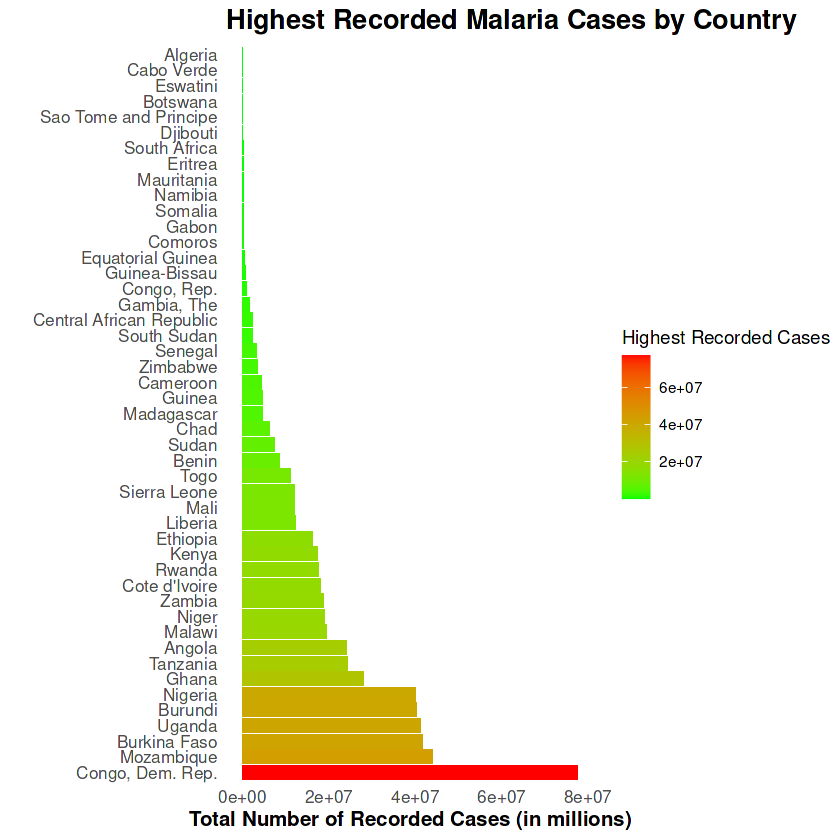

In [11]:
# Distribution of malaria cases for each African country over the 10 year period
malaria_cases <- malaria_data %>%
  filter(Malaria.cases.reported > 0) %>%
  group_by(Country.Name) %>%
    summarise(Highest_Recorded_Cases = sum(Malaria.cases.reported, na.rm = TRUE))

# Reordering levels of Country.Name based on Highest_Recorded_Cases in descending order
malaria_cases$Country.Name <- reorder(malaria_cases$Country.Name, -malaria_cases$Highest_Recorded_Cases)

# Plotting the bar chart
ggplot(data = malaria_cases, aes(x = Highest_Recorded_Cases, y = Country.Name)) +
  geom_bar(stat = "identity", aes(fill = Highest_Recorded_Cases)) +  
  labs(
    title = "Highest Recorded Malaria Cases by Country",
    x = "Total Number of Recorded Cases (in millions)",  
    y = ""
  ) +
  scale_fill_gradient(low = "green", high = "red", name = "Highest Recorded Cases") + 
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10, angle = 0, hjust = 0.5),
    axis.text.y = element_text(size = 10, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

_**Question: Has there been a trend for the number of cases recorded over a period of 10 years?**_

A noteworthy observation emerges from the data spanning the decade from 2007 to 2017—an evident escalation in the number of Malaria cases. This upward trajectory signifies a pressing concern regarding the effectiveness of prevailing Malaria prevention methods.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


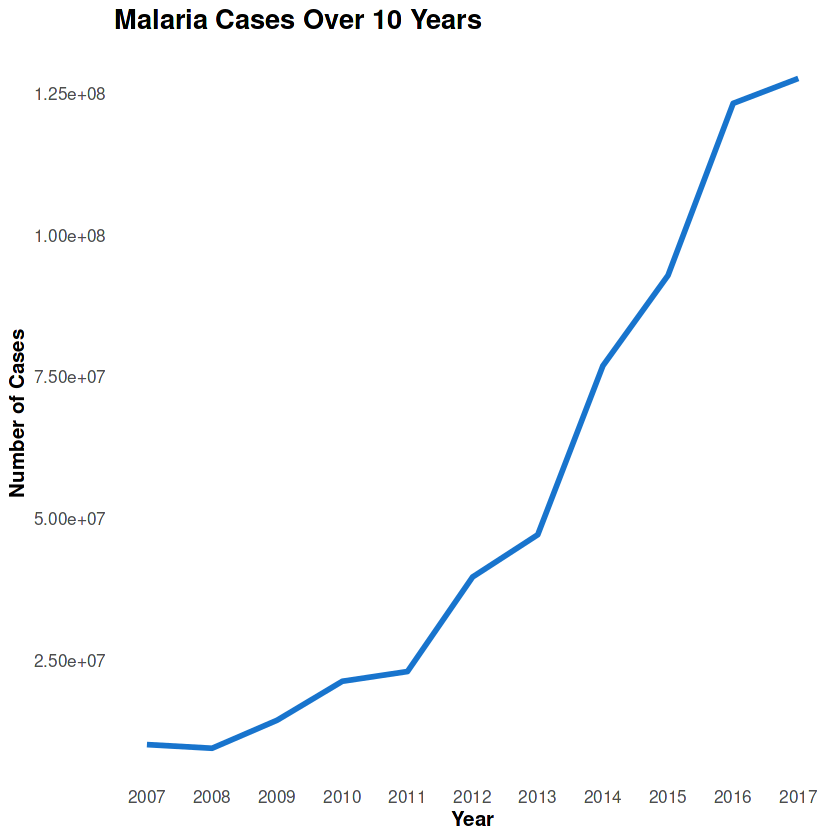

In [12]:
# Cases Reported Trend over 10 years
year_trends <- malaria_data %>%
  group_by(Year) %>%
  summarise(Cases_Reported = sum(Malaria.cases.reported, na.rm = TRUE))

# Plotting the line chart
ggplot(data = year_trends, aes(x = Year, y = Cases_Reported)) +
  geom_line(color = "dodgerblue3", size = 1.2) +
  labs(
    title = "Malaria Cases Over 10 Years",
    x = "Year",
    y = "Number of Cases"
  ) +
  theme_minimal() +
  scale_x_continuous(breaks = unique(year_trends$Year), labels = as.character(unique(year_trends$Year))) + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    legend.position = "none"
  )

_**Question: Has there been a trend for the number of incidences recorded over a period of 10 years?**_

Conversely, the ensuing bar chart presents a compelling counter-narrative. It unequivocally illustrates a marked decline in the incidence of Malaria, quantified per 1000 individuals, over the same ten-year duration. This decline is a testament to the remarkable strides made in Malaria control endeavors, bearing witness to the efficacy of concerted efforts in combating this formidable public health challenge.

`geom_smooth()` using formula = 'y ~ x'


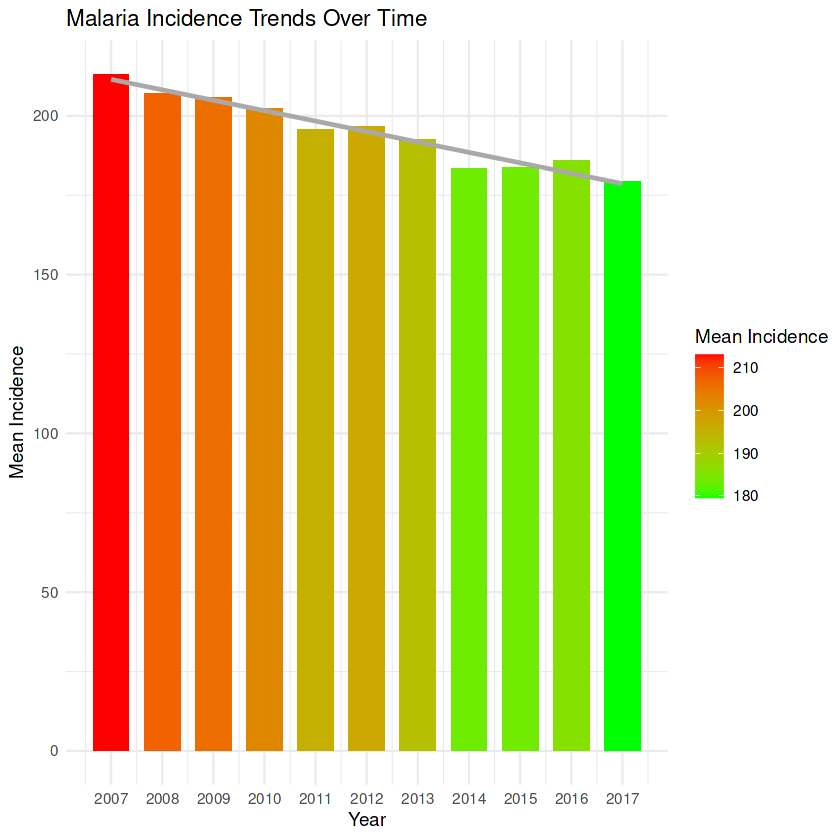

In [13]:
# Malaria Incidence Per 1000 people
malaria_trends <- malaria_data %>%
  group_by(Year) %>%
  summarise(Mean_Incidence = mean(Incidence.of.malaria..per.1.000.population.at.risk., na.rm = TRUE))
ggplot(data = malaria_trends) +
  geom_col(mapping = aes(x = Year, y = Mean_Incidence, fill = Mean_Incidence), width = 0.7) +  
  geom_smooth(mapping = aes(x = Year, y = Mean_Incidence), method = "lm", se = FALSE, color = "darkgrey") +  
  labs(
    title = "Malaria Incidence Trends Over Time",
    x = "Year",
    y = "Mean Incidence",
    fill = "Mean Incidence"
  ) +
  theme_minimal() +  
scale_x_continuous(breaks = unique(year_trends$Year), labels = as.character(unique(year_trends$Year))) +  
  scale_fill_gradient(low = "green", high = "red")

### Access to Basic Drinking Water and Sanitation: Impact on Malaria Rates

_**Question: Does access to basic drinking water and sanitation affect malaria rates?**_

Certainly, access to basic drinking water and sanitation services plays a crucial role in influencing malaria rates. There is a clear and positive correlation between the percentage of the population with access to both basic drinking water and sanitation services and the reduction in malaria incidence. This is evident both in rural and urban areas. As the percentage of the population with access to these services increases, malaria incidence tends to drop significantly.

`geom_smooth()` using formula = 'y ~ x'


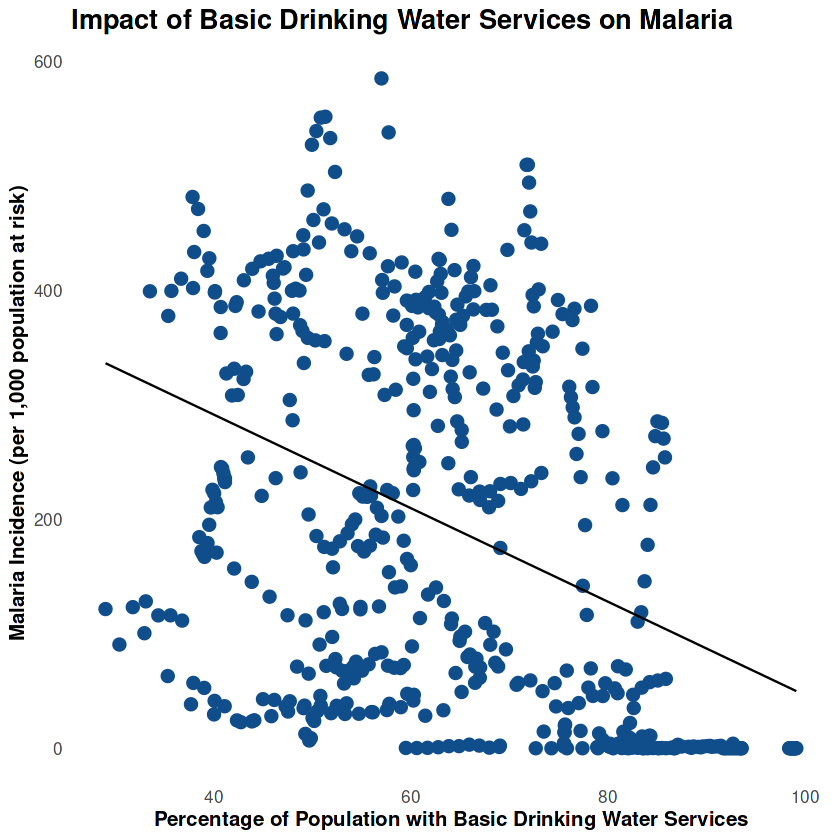

In [14]:
# Calculating correlation between Basic Drinking Water Services and Malaria Incidence
correlation_matrix <- cor(malaria_data[, c("People.using.at.least.basic.drinking.water.services....of.population.", "Incidence.of.malaria..per.1.000.population.at.risk.")])

# Creating a scatter plot
ggplot(data = malaria_data, aes(x = People.using.at.least.basic.drinking.water.services....of.population., y = Incidence.of.malaria..per.1.000.population.at.risk.)) +
  geom_point(size = 3, color = "dodgerblue4") +
  labs(
    title = "Impact of Basic Drinking Water Services on Malaria",
    x = "Percentage of Population with Basic Drinking Water Services",
    y = "Malaria Incidence (per 1,000 population at risk)"
  ) +
  geom_smooth(method = "lm", se = FALSE, color = "black", size = 0.5) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

`geom_smooth()` using formula = 'y ~ x'


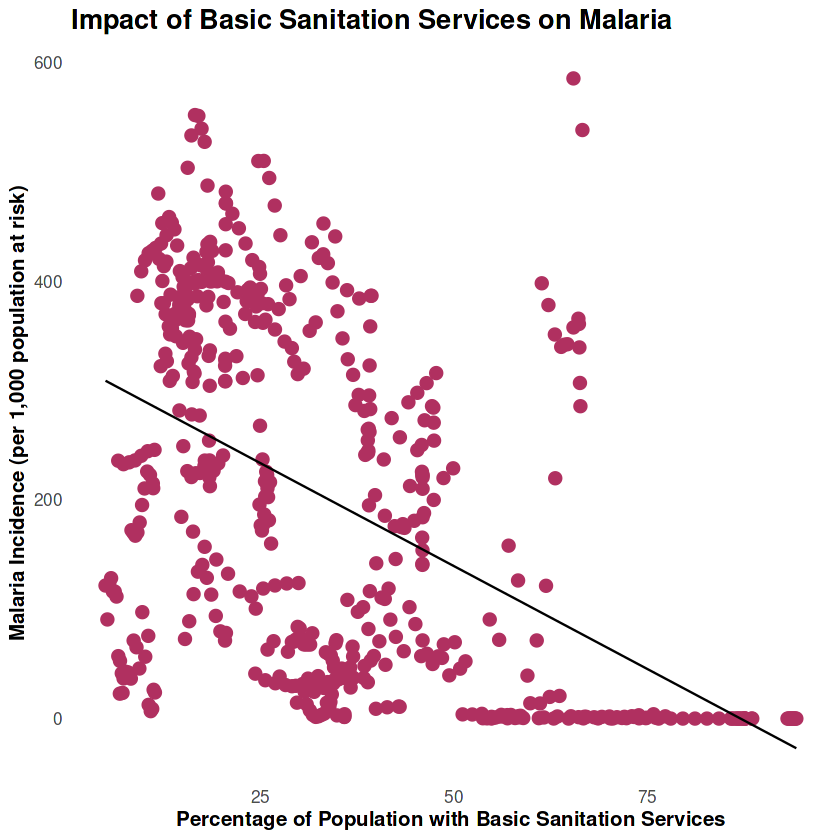

In [15]:
# Removing rows with missing or non-finite values for sanitation services
cleaned_sanitation_data <- na.omit(malaria_data[, c("People.using.at.least.basic.sanitation.services....of.population.", "Incidence.of.malaria..per.1.000.population.at.risk.")])

# Calculating the correlation between Basic Sanitation Services and Malaria Incidence
correlation_matrix_sanitation <- cor(cleaned_sanitation_data)

# Creating a scatter plot for sanitation services
ggplot(data = cleaned_sanitation_data, aes(x = People.using.at.least.basic.sanitation.services....of.population., y = Incidence.of.malaria..per.1.000.population.at.risk.)) +
  geom_point(size = 3, color = "maroon") +
  labs(
    title = "Impact of Basic Sanitation Services on Malaria",
    x = "Percentage of Population with Basic Sanitation Services",
    y = "Malaria Incidence (per 1,000 population at risk)"
  ) +
  geom_smooth(method = "lm", se = FALSE, color = "black", size = 0.5) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

#### Impact of Basic Access to Services on Malaria in Rural Areas


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


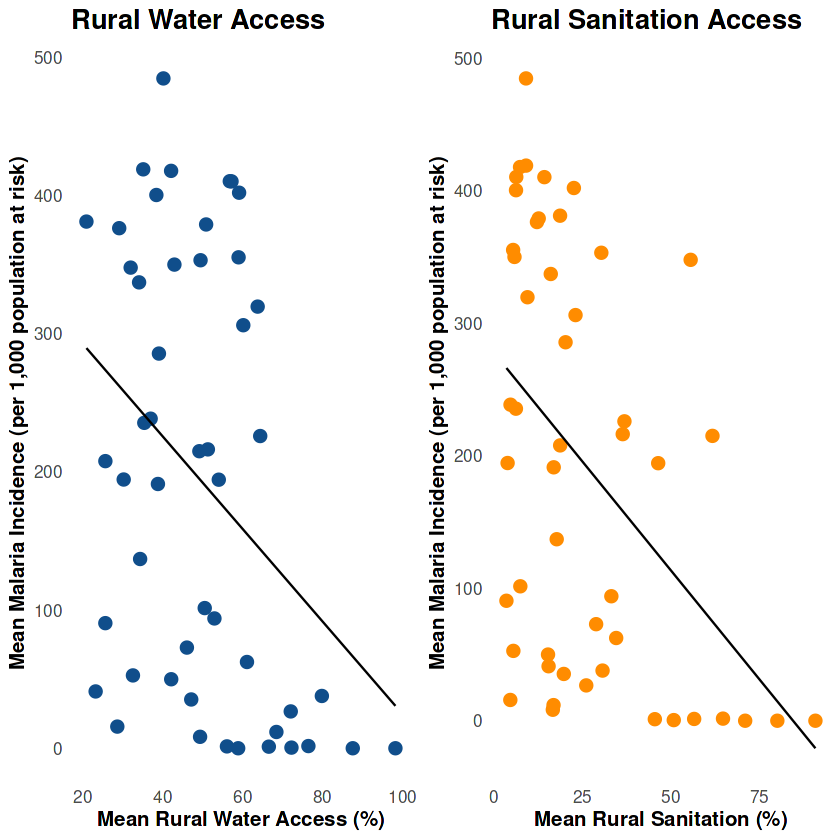

In [16]:
# Impact of Basic Access to Services on Malaria in Rural areas

rural_water_sanitation_analysis <- malaria_data %>%
  group_by(Country.Name) %>%
  summarise(Mean_Rural_Water_Access = mean(People.using.at.least.basic.drinking.water.services..rural....of.rural.population., na.rm = TRUE),
            Mean_Rural_Sanitation = mean(People.using.at.least.basic.sanitation.services..rural....of.rural.population., na.rm = TRUE),
            Mean_Malaria_Incidence = mean(Incidence.of.malaria..per.1.000.population.at.risk., na.rm = TRUE))

# Removing non-finite values for rural areas
cleaned_rural_data <- na.omit(rural_water_sanitation_analysis)

# Create a scatter plot for Mean Rural Water Access vs. Mean Malaria Incidence
plot_water_vs_malaria_rural <- ggplot(data = cleaned_rural_data, aes(x = Mean_Rural_Water_Access, y = Mean_Malaria_Incidence)) +
  geom_point(size = 3, color = "dodgerblue4") +
  labs(
    title = "Rural Water Access",
    x = "Mean Rural Water Access (%)",
    y = "Mean Malaria Incidence (per 1,000 population at risk)"
  ) +
  geom_smooth(method = "lm", se = FALSE, color = "black", size = 0.5) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

# Create a scatter plot for Mean Rural Sanitation vs. Mean Malaria Incidence
plot_sanitation_vs_malaria_rural <- ggplot(data = cleaned_rural_data, aes(x = Mean_Rural_Sanitation, y = Mean_Malaria_Incidence)) +
  geom_point(size = 3, color = "darkorange") +
  labs(
    title = "Rural Sanitation Access",
    x = "Mean Rural Sanitation (%)",
    y = "Mean Malaria Incidence (per 1,000 population at risk)"
  ) +
  geom_smooth(method = "lm", se = FALSE, color = "black", size = 0.5) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

# Arrange the plots side by side
library(gridExtra)
grid.arrange(plot_water_vs_malaria_rural, plot_sanitation_vs_malaria_rural, ncol = 2)

#### Impact of Basic Access to Services on Malaria in Urban Areas

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


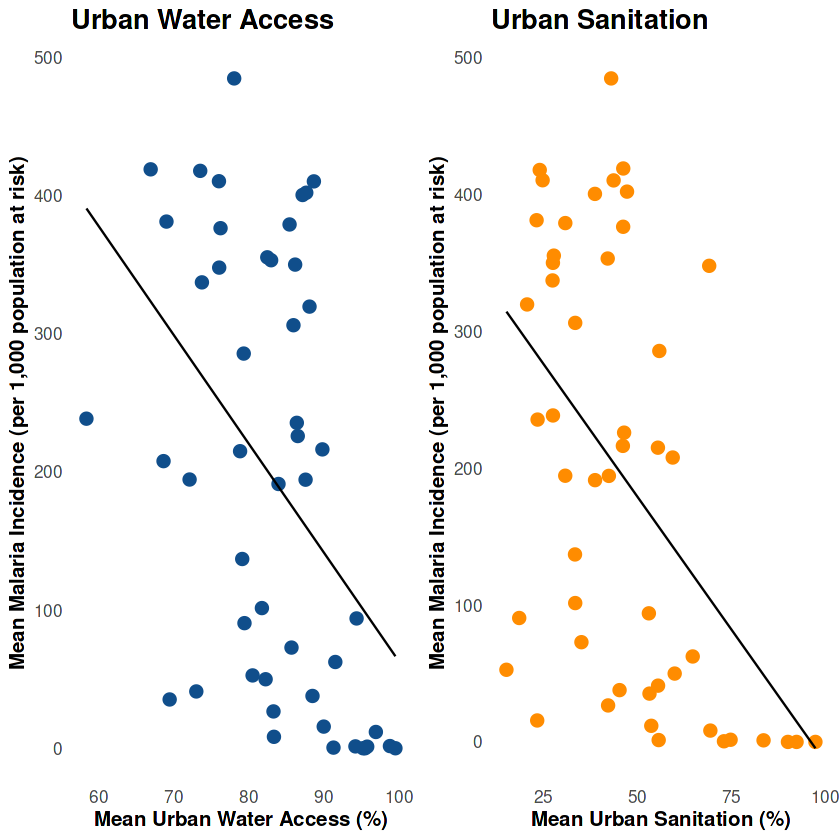

In [17]:
# Impact of Basic Access to Services on Malaria in Urban areas
urban_water_sanitation_analysis <- malaria_data %>%
  group_by(Country.Name) %>%
  summarise(Mean_Urban_Water_Access = mean(People.using.at.least.basic.drinking.water.services..urban....of.urban.population., na.rm = TRUE),
            Mean_Urban_Sanitation = mean(People.using.at.least.basic.sanitation.services..urban.....of.urban.population., na.rm = TRUE),
            Mean_Malaria_Incidence = mean(Incidence.of.malaria..per.1.000.population.at.risk., na.rm = TRUE))

# Remove missing values and non-finite values
cleaned_urban_data <- na.omit(urban_water_sanitation_analysis)

# Create a scatter plot for Mean Urban Water Access vs. Mean Malaria Incidence
plot_water_vs_malaria <- ggplot(data = cleaned_urban_data, aes(x = Mean_Urban_Water_Access, y = Mean_Malaria_Incidence)) +
  geom_point(size = 3, color = "dodgerblue4") +
  labs(
    title = "Urban Water Access",
    x = "Mean Urban Water Access (%)",
    y = "Mean Malaria Incidence (per 1,000 population at risk)"
  ) +
  geom_smooth(method = "lm", se = FALSE, color = "black", size = 0.5) + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

# Create a scatter plot for Mean Urban Sanitation vs. Mean Malaria Incidence
plot_sanitation_vs_malaria <- ggplot(data = cleaned_urban_data, aes(x = Mean_Urban_Sanitation, y = Mean_Malaria_Incidence)) +
  geom_point(size = 3, color = "darkorange") +
  labs(
    title = "Urban Sanitation",
    x = "Mean Urban Sanitation (%)",
    y = "Mean Malaria Incidence (per 1,000 population at risk)"
  ) +
  geom_smooth(method = "lm", se = FALSE, color = "black", size = 0.5) +  
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  )

# Arrange the plots side by side
library(gridExtra)
grid.arrange(plot_water_vs_malaria, plot_sanitation_vs_malaria, ncol = 2)

### Rural vs. Urban Disparities

_**Question: Are there disparities in malaria rates between rural and urban populations?**_

According to the analysis, there is a significant difference in mean incidence between rural and urban areas. This conclusion is based on the results of a two-sample t-test performed on the incidence rates in these two population types. The t-test yielded a p-value of less than 0.05, indicating a statistically significant difference. This finding suggests that the incidence of malaria varies significantly between rural and urban areas. Further investigations and targeted interventions may be needed to understand the underlying factors contributing to this disparity and to develop strategies for malaria control and prevention tailored to each population type.

#### Statistical Test for Disparities

To check disparities, I conducted a statistical test to prove significance. If the p-value is below a chosen significance level (e.g., 0.05), I can conclude that there is a significant difference in mean incidence between rural and urban areas.

In [ ]:
# Statistical Test for Disparities

t_test_result <- t.test(
  malaria_data$Incidence.of.malaria..per.1.000.population.at.risk.[malaria_data$Rural.population....of.total.population.],
  malaria_data$Incidence.of.malaria..per.1.000.population.at.risk.[malaria_data$Urban.population....of.total.population.])

# Interpretation of results

if (t_test_result$p.value < 0.05) {
  cat("There is a significant difference in incidence between rural and urban areas.")
} else {
  cat("There is no significant difference in incidence between rural and urban areas.")
}

#### Disparities in Mean Incidences

In [ ]:
# Mean Incidences for Rural and Urban Areas
mean_incidence_rural <- mean(malaria_data$Incidence.of.malaria..per.1.000.population.at.risk.[malaria_data$Rural.population....of.total.population.], na.rm = TRUE)
mean_incidence_urban <- mean(malaria_data$Incidence.of.malaria..per.1.000.population.at.risk.[malaria_data$Urban.population....of.total.population.], na.rm = TRUE)

# Creating a data frame for mean incidences
mean_incidences <- data.frame(
  Population_Type = c("Rural", "Urban"),
  Mean_Incidence = c(mean_incidence_rural, mean_incidence_urban)
)

# Creating a pie chart with labels
ggplot(data = mean_incidences, aes(x = "", y = Mean_Incidence, fill = Population_Type)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = paste0(round(Mean_Incidence, 2))), position = position_stack(vjust = 0.5), size = 5, color = "white") +  
  coord_polar(theta = "y") +  
  labs(
    title = "Mean Incidences for Rural and Urban Areas",
    x = "",
    y = "",
    fill = "Population Type"
  ) +
  scale_fill_manual(values = c("Rural" = "dodgerblue4", "Urban" = "darkorange")) +  
  theme_void() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

### Geospatial Patterns in malaria incidence

_**Can we identify Geo spatial patterns in malaria incidence?**_


Yes, the results shown in the map below reveal a striking pattern of high malaria cases concentrated in several regions of Africa, particularly in East Africa, West Africa, Central Africa, and numerous Sub-Saharan African countries. Countries such as Angola, Burkina Faso, and Burundi have reported substantial cases, likely influenced by factors like climate, healthcare infrastructure, and population density. Notably, countries such as Nigeria, with over 40 million cases, and the Democratic Republic of the Congo, with a staggering 77 million cases, stand out as significant contributors to the malaria epidemic.

Conversely, Northern and Southern African countries, such as Algeria, Botswana, and Namibia, exhibit relatively lower malaria cases, possibly owing to different environmental conditions and stronger malaria control efforts. These findings underscore the regional disparities in malaria burden, emphasizing the importance of targeted interventions and healthcare strategies to combat the disease effectively across the continent.

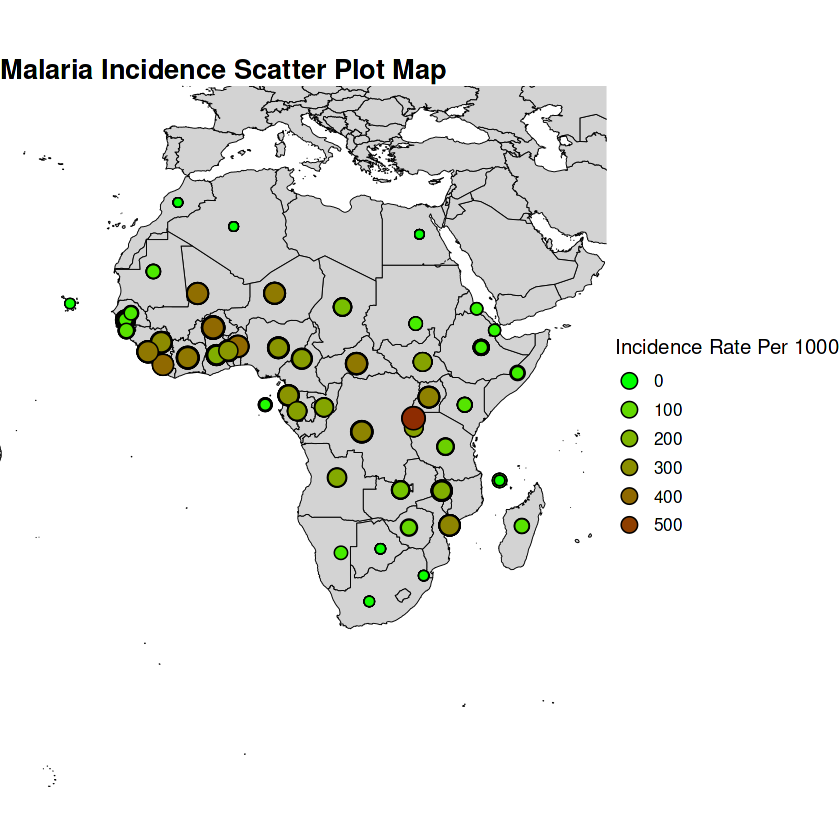

In [47]:
# Remove rows with missing values
malaria_data <- malaria_data %>%
  filter(!is.na(Malaria.cases.reported))

# Epidemic Distribution over the Continent of Africa
malaria_cases <- malaria_data %>%
  group_by(Country.Name) %>%
  summarise(Highest_Recorded_Cases = sum(Malaria.cases.reported, na.rm = TRUE))

# Loading world map data
world <- ne_countries(scale = "large", returnclass = "sf")

# Creating a base map of Africa
base_map <- ggplot(data = world) +
  geom_sf(fill = "lightgray", color = "black") +
  coord_sf(xlim = c(-35, 60), ylim = c(-60, 50), expand = FALSE) +
  theme_void() +
  labs(title = "Malaria Incidence Scatter Plot Map")

# Creating a scatter plot with point size and color representing the incidence rate
scatter_map <- base_map +
  geom_point(data = malaria_data, aes(x = longitude, y = latitude, fill = Incidence.of.malaria..per.1.000.population.at.risk., size = Incidence.of.malaria..per.1.000.population.at.risk.), shape = 21) +
  scale_fill_gradient(low = "green", high = "darkred", name = "Incidence Rate Per 1000") +  
  scale_size_continuous(range = c(2, 6), name = "Incidence Rate Per 1000") + 
  guides(fill = guide_legend(override.aes = list(size = 4, 6)))+
theme_void() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

print(scatter_map)


### Impact of Population Growth on Incidence

***Population Distribution***

The population distribution between rural and urban areas shows no significant difference in terms of mean proportions. This indicates that, on average, countries in the dataset have similar population distributions between these two areas. However, it's important to recognize that regional variations may exist within individual countries, and these localized differences can influence various health outcomes, including malaria incidence rates. Therefore, a detailed examination of regional disparities within countries is crucial for a comprehensive understanding of population dynamics and their impact on health.

In [ ]:
# Population Distribution

population_distribution <- malaria_data %>%
  group_by(Country.Name) %>%
  summarise(
    Rural_Population = mean(Rural.population....of.total.population., na.rm = TRUE),
    Urban_Population = mean(Urban.population....of.total.population., na.rm = TRUE)
  )

# Remove missing values and non-finite values
cleaned_population_data <- na.omit(population_distribution)

# Create a stacked bar chart for population distribution
population_distribution_chart <- ggplot(data = cleaned_population_data, aes(x = Country.Name)) +
  geom_bar(aes(y = Rural_Population, fill = "Rural Population"), stat = "identity", width = 0.5) +
  geom_bar(aes(y = Urban_Population, fill = "Urban Population"), stat = "identity", width = 0.5) +
  scale_fill_manual(values = c("Rural Population" = "blue", "Urban Population" = "green")) +
  labs(
    title = "Population Distribution: Rural and Urban Areas",
    x = "Country",
    y = "Population",
    fill = "Population Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10, angle = 90, hjust = 1),  
    axis.text.y = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  ) +
  coord_flip()  

population_distribution_chart

_**Question: How does population growth impact malaria incidence?**_

Population growth has a complex impact on malaria incidence. While an increase in population often leads to higher malaria transmission due to the larger number of people at risk, the actual relationship is influenced by various factors. Rapid population growth can strain healthcare and infrastructure resources, potentially leading to reduced access to malaria prevention and treatment measures. However, in some cases, improved healthcare infrastructure and increased awareness accompanying population growth can result in better malaria control efforts, mitigating the disease's impact. Therefore, the specific impact of population growth on malaria incidence varies by region and depends on the interplay of factors such as healthcare access, public health interventions, and environmental conditions.

In [ ]:
# Remove missing and non-finite values
cleaned_data <- na.omit(malaria_data[, c("Rural.population.growth..annual...", "Incidence.of.malaria..per.1.000.population.at.risk.")])

# Calculate the impact of rural population growth on malaria incidence
cleaned_data <- cleaned_data %>%
  mutate(
    Rural_Population_Growth_Impact = Rural.population.growth..annual... * Incidence.of.malaria..per.1.000.population.at.risk.
  )

# Create the plot
ggplot(data = cleaned_data, aes(x = Rural.population.growth..annual..., y = Incidence.of.malaria..per.1.000.population.at.risk.)) +
  geom_smooth(method = "lm", se = FALSE, color = "darkgrey") +
  geom_point(aes(size = Rural_Population_Growth_Impact), color = "dodgerblue4", alpha = 0.7) +
  scale_size_continuous(name = "Impact", labels = scales::comma) +
  labs(
    title = "Impact of Rural Population Growth on Malaria Incidence",
    x = "Rural Population Growth (%)",
    y = "Incidence per 1,000 population"
  ) +
  theme_minimal()+
 theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10, angle = 90, hjust = 1),  
    axis.text.y = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
     )

In [ ]:
# Remove missing and non-finite values
cleaned_data <- na.omit(malaria_data[, c("Urban.population.growth..annual...", "Incidence.of.malaria..per.1.000.population.at.risk.")])

# Calculate the impact of urban population growth on malaria incidence
cleaned_data <- cleaned_data %>%
  mutate(
    Urban_Population_Growth_Impact = Urban.population.growth..annual... * Incidence.of.malaria..per.1.000.population.at.risk.
  )

# Create the plot
ggplot(data = cleaned_data, aes(x = Urban.population.growth..annual..., y = Incidence.of.malaria..per.1.000.population.at.risk.)) +
  geom_smooth(method = "lm", se = FALSE, color = "darkgrey") +
  geom_point(aes(size = Urban_Population_Growth_Impact), alpha = 0.7, color = "dodgerblue4") +
  scale_size_continuous(name = "Impact", labels = scales::comma) +
  labs(
    title = "Impact of Urban Population Growth on Malaria Incidence",
    x = "Urban Population Growth (%)",
    y = "Incidence per 1,000 population"
  ) +
  theme_minimal()+
 theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10, angle = 90, hjust = 1),  
    axis.text.y = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
)

### Correlation Analysis

The correlation matrix and heatmap shows the correlations (values ranging from -1 to 1) between various variables in the dataset as follows:

1. **Incidence of malaria**:
   - Positively correlated with rural population and rural population growth.
   - Negatively correlated with urban population, urban population growth, access to basic drinking water services, and access to basic sanitation services.

2. **Rural population**:
   - Positively correlated with incidence of malaria, rural population growth, and negatively correlated with urban population, urban population growth, access to basic drinking water services, and access to basic sanitation services.

3. **Urban population**:
   - Negatively correlated with incidence of malaria, rural population, rural population growth, and access to basic drinking water services.
   - Positively correlated with access to basic sanitation services.

4. **Rural population growth**:
   - Positively correlated with incidence of malaria, rural population, and rural population growth.
   - Negatively correlated with urban population, urban population growth, access to basic drinking water services, and access to basic sanitation services.

5. **Urban population growth**:
   - Positively correlated with incidence of malaria, urban population, and access to basic sanitation services.
   - Negatively correlated with rural population, rural population growth, and access to basic drinking water services.

6. **Access to basic drinking water services**:
   - Negatively correlated with incidence of malaria, rural population, rural population growth, and urban population growth.
   - Positively correlated with urban population and access to basic sanitation services.

7. **Access to basic sanitation services**:
   - Negatively correlated with incidence of malaria, rural population, rural population growth, urban population growth, and access to basic drinking water services.
   - Positively correlated with urban population.

These correlations provide insights into how different factors relate to each other in your dataset. For example, there is a positive correlation between rural population and rural population growth, indicating that as rural populations grow, so does their growth rate. Conversely, there is a negative correlation between access to basic drinking water services and the incidence of malaria, suggesting that improved access to clean water may be associated with lower malaria rates.

In [ ]:
# Calculating the correlation matrix with pairwise complete observations

correlation_matrix <- cor(malaria_data[, c("Incidence.of.malaria..per.1.000.population.at.risk.",
                                            "Rural.population....of.total.population.",
                                            "Urban.population....of.total.population.",
                                            "Rural.population.growth..annual...",
                                            "Urban.population.growth..annual...",
                                            "People.using.at.least.basic.drinking.water.services....of.population.",
                                            "People.using.at.least.basic.sanitation.services....of.population.")],
                          use = "pairwise.complete.obs")
print(correlation_matrix)

## Recommendations

1. **Collect Additional Data to Help:**
   
- investigate the relationship between factors such as bed net usage and malaria incidence.
- examine intermittent preventive treatment (IPT) data during pregnancy and its impact on maternal and child health.
- explore the correlation between access to safe drinking water, sanitation services, and malaria prevalence.
- examine the percentage of children receiving antimalarial drugs when presenting with fever and its overall health impact.

2. **Implement Targeted Preventive Measures to:**
- emphasize the importance of basic drinking water and sanitation services.
- address prevelance in most vulnerable regions and communities. 
   
These focused actions will not only enhance research comprehensiveness but also lead to more effective malaria prevention and control strategies, especially in vulnerable populations.

## Conclusion

In the relentless battle against malaria in Africa, this exploration, "Malaria Insights Africa," has provided valuable insights. This project has revealed a concerning rise in cases over the past decade, emphasizing the need to reevaluate prevention methods. However, the analysis also shows a significant reduction in malaria incidence, signifying progress. Understanding the impact of basic services like safe water and sanitation is vital, as are targeted interventions to address rural-urban disparities. Geo-spatial analysis highlights high-burden regions like East and West Africa. Overall, this project underscores the challenges and progress in malaria control. Further data collection and research in areas like bed net usage, malaria in pregnancy, water and sanitation, and child healthcare will enhance our understanding and inform effective interventions, reducing malaria's burden in vulnerable populations.